In [2]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms,models
from torchvision.datasets import ImageFolder
from torchsummary import summary
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import numpy as np
import seaborn as sns
import pandas as pd

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Use GPU if it's available or else use CPU.
print(device) #Prints the device we're using.


mean,std = [0.5,0.5,0.5], [0.5,0.5,0.5]
train = ImageFolder('dataset',transform=transforms.Compose([
    transforms.Resize((28,28)),transforms.ToTensor(),
        transforms.Normalize(mean,std)]))

class Cnn(nn.Module):
    def __init__(self) -> None:
        super(Cnn,self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(3,64,5,1), 
            nn.ReLU(), # 24x 24
            nn.MaxPool2d(2,2), # 16x 12 x 12

            nn.Conv2d(64,128,3), 
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 32x5x5

            nn.Conv2d(128,128,5), # 64x 1x14
            nn.ReLU(),

            nn.Conv2d(128,36,1,1) # 10x1x1
            
        )
    def forward(self,x):
        x = self.conv(x)
        return x

model =  Cnn()
model.to(device)
batch=16
train_dl = DataLoader(train,batch,shuffle=True,num_workers=4)

def train(dataloader,model,loss_fn,optimizer):
    model.train()
    total= 0 
    correct = 0
    running_loss = 0

    for (x,y) in tqdm(dataloader):
        output = model(x.to(device))
        output = torch.flatten(output,1)
        loss = loss_fn(output,y.to(device))

        running_loss += loss.item()
        total += y.size(0)
        predictions = output.argmax(dim=1).cpu().detach()
        # index of the highest score for all the samples in the batch
        correct += (predictions==y.cpu().detach()).sum().item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    acc=100*(correct/total)
    avg_loss = running_loss/len(dataloader) # average loss for a single batch
    print(f'\nTraining Loss = {avg_loss:.6f}',end='\t')
    print(f'Accuracy on Training set = {100*(correct/total):.6f}% [{correct}/{total}]') #Prints the Accuracy.
    
    return avg_loss,acc



def optimize(train_dataloader,model,
loss_fn,optimizer,nb_epochs):
   
    train_losses = []
    valid_losses = []
    val= []
    acc=[]

    for epoch in range(nb_epochs):
        print(f'\nEpoch {epoch+1}/{nb_epochs}')
        print('-------------------------------')
        train_loss,a = train(train_dataloader,model,loss_fn,optimizer) 
        train_losses.append(train_loss)
        acc.append(a)
  
    
    print('\nTraining has completed!')
    
    return train_losses,acc

loss_fn   = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=5e-5) 
nb_epochs = 30
#Call the optimize function.
train_losses,acc = optimize(train_dl,model,loss_fn,optimizer,nb_epochs)


def Final_test(dataloader,model,loss_fn):

#     model in evaluation mode
    model.eval() 
    
    total = 0
    correct = 0
    running_loss = 0
    
    with torch.no_grad(): # gradients calculation not required
        
        for x,y in dataloader:
            
            output        = model(x.to(device)) #model's output.
            output = torch.flatten(output,1)
            loss          = loss_fn(output,y.to(device)).item() #loss calculation.
            running_loss += loss
            
            total        += y.size(0)
            predictions   = output.argmax(dim=1).cpu().detach()
            correct      += (predictions == y.cpu().detach()).sum().item()
            
    avg_loss = running_loss/len(dataloader) #Average loss per batch.      
    val_acc = 100*(correct/total)
    print(f'test Loss = {avg_loss:.6f}',end='\t')
    print(f'Accuracy on test set = {100*(correct/total):.6f}% [{correct}/{total}]') #Prints the Accuracy.




cuda

Epoch 1/30
-------------------------------


100%|██████████| 4177/4177 [01:27<00:00, 47.77it/s] 



Training Loss = 0.417563	Accuracy on Training set = 89.237031% [59638/66831]

Epoch 2/30
-------------------------------


100%|██████████| 4177/4177 [00:48<00:00, 86.51it/s] 



Training Loss = 0.120148	Accuracy on Training set = 96.607862% [64564/66831]

Epoch 3/30
-------------------------------


100%|██████████| 4177/4177 [00:49<00:00, 83.61it/s] 



Training Loss = 0.086046	Accuracy on Training set = 97.525101% [65177/66831]

Epoch 4/30
-------------------------------


100%|██████████| 4177/4177 [00:50<00:00, 82.11it/s] 



Training Loss = 0.067009	Accuracy on Training set = 98.105670% [65565/66831]

Epoch 5/30
-------------------------------


100%|██████████| 4177/4177 [00:50<00:00, 82.02it/s] 



Training Loss = 0.055683	Accuracy on Training set = 98.407924% [65767/66831]

Epoch 6/30
-------------------------------


100%|██████████| 4177/4177 [00:51<00:00, 81.59it/s] 



Training Loss = 0.045428	Accuracy on Training set = 98.701202% [65963/66831]

Epoch 7/30
-------------------------------


100%|██████████| 4177/4177 [00:51<00:00, 81.79it/s] 



Training Loss = 0.038354	Accuracy on Training set = 98.867292% [66074/66831]

Epoch 8/30
-------------------------------


100%|██████████| 4177/4177 [00:50<00:00, 82.14it/s] 



Training Loss = 0.033575	Accuracy on Training set = 98.995975% [66160/66831]

Epoch 9/30
-------------------------------


100%|██████████| 4177/4177 [00:49<00:00, 84.12it/s] 



Training Loss = 0.028540	Accuracy on Training set = 99.181518% [66284/66831]

Epoch 10/30
-------------------------------


100%|██████████| 4177/4177 [00:49<00:00, 84.31it/s] 



Training Loss = 0.024512	Accuracy on Training set = 99.278778% [66349/66831]

Epoch 11/30
-------------------------------


100%|██████████| 4177/4177 [00:49<00:00, 83.98it/s] 



Training Loss = 0.020779	Accuracy on Training set = 99.388009% [66422/66831]

Epoch 12/30
-------------------------------


100%|██████████| 4177/4177 [00:49<00:00, 83.98it/s] 



Training Loss = 0.018287	Accuracy on Training set = 99.461328% [66471/66831]

Epoch 13/30
-------------------------------


100%|██████████| 4177/4177 [00:50<00:00, 82.98it/s] 



Training Loss = 0.015885	Accuracy on Training set = 99.525669% [66514/66831]

Epoch 14/30
-------------------------------


100%|██████████| 4177/4177 [00:40<00:00, 102.37it/s]



Training Loss = 0.013834	Accuracy on Training set = 99.582529% [66552/66831]

Epoch 15/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 106.01it/s]



Training Loss = 0.011877	Accuracy on Training set = 99.640885% [66591/66831]

Epoch 16/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 105.24it/s]



Training Loss = 0.010382	Accuracy on Training set = 99.684278% [66620/66831]

Epoch 17/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 106.29it/s]



Training Loss = 0.009232	Accuracy on Training set = 99.726175% [66648/66831]

Epoch 18/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 105.55it/s]



Training Loss = 0.008583	Accuracy on Training set = 99.730664% [66651/66831]

Epoch 19/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 106.31it/s]



Training Loss = 0.006811	Accuracy on Training set = 99.789020% [66690/66831]

Epoch 20/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 105.74it/s]



Training Loss = 0.006096	Accuracy on Training set = 99.814457% [66707/66831]

Epoch 21/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 105.45it/s]



Training Loss = 0.005682	Accuracy on Training set = 99.829420% [66717/66831]

Epoch 22/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 105.92it/s]



Training Loss = 0.005273	Accuracy on Training set = 99.842887% [66726/66831]

Epoch 23/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 105.90it/s]



Training Loss = 0.004623	Accuracy on Training set = 99.841391% [66725/66831]

Epoch 24/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 106.14it/s]



Training Loss = 0.004061	Accuracy on Training set = 99.874310% [66747/66831]

Epoch 25/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 106.14it/s]



Training Loss = 0.004092	Accuracy on Training set = 99.860843% [66738/66831]

Epoch 26/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 105.59it/s]



Training Loss = 0.003347	Accuracy on Training set = 99.910221% [66771/66831]

Epoch 27/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 106.12it/s]



Training Loss = 0.003422	Accuracy on Training set = 99.898251% [66763/66831]

Epoch 28/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 105.28it/s]



Training Loss = 0.002473	Accuracy on Training set = 99.925184% [66781/66831]

Epoch 29/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 105.70it/s]



Training Loss = 0.002986	Accuracy on Training set = 99.910221% [66771/66831]

Epoch 30/30
-------------------------------


100%|██████████| 4177/4177 [00:39<00:00, 105.68it/s]


Training Loss = 0.002190	Accuracy on Training set = 99.943140% [66793/66831]

Training has completed!


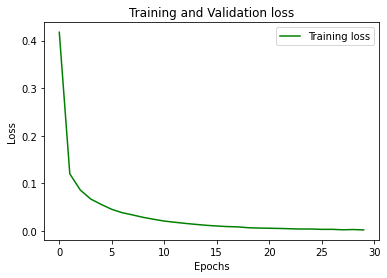

In [3]:
epochs = range(nb_epochs)
plt.plot(epochs, train_losses, 'g', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



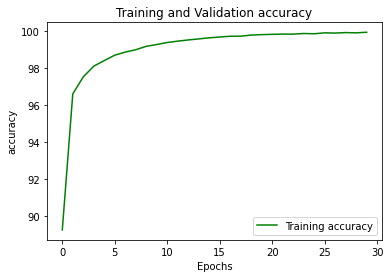

In [4]:

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(),'model.pth')